In [160]:
import numpy as np
from numpy import *
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from matplotlib import *
import random

In [161]:
X_train,y_train =load_svmlight_file('a9a.txt',n_features=123)
X_train = X_train.toarray()
X_validation,y_validation = load_svmlight_file('a9a.t',n_features=123)
X_validation= X_validation.toarray()

In [162]:
def loss(X,y,W,b,C):
	data_loss = 0.5*np.sum( W **2 ) + C *np.sum(np.maximum(0, 1-y*(np.dot(X,W)+b) ))
	return data_loss/y.size

In [163]:
def gradient(X,y,w,b,C):
	margin = 1 - y * (np.dot(X,w)+b ) 
	y_tmp = -y
	y_tmp[margin<0] = 0
	dw =  w + C / y.size *  np.dot(X.T,y_tmp)  
	db = C / y.size * np.sum(y_tmp)
	return dw, db

In [164]:
def NAG(xt,yt,w,b,eta,times,xv,yv,C=1,batch_size=1000):
	LNAG = []
	yy = 0.9
	vw = np.zeros(w.shape)
	vb = 0
	for i in range(times):
		random = list(set(np.random.randint(0,yt.size,size=batch_size)))
		dx = xt[random]
		dy = yt[random]
		w_gt,b_gt = gradient(dx,dy,w-yy*vw ,b-yy*vb ,C)
		vw = yy*vw + eta * w_gt
		w = w - vw
		vb = yy*vb + eta * b_gt
		b = b - vb
		LNAG.append( loss(xv,yv,w,b,C) )
	return LNAG


In [165]:
eta=0.001
times=700
w = np.zeros(X_train.shape[1]).T
b=0
C = 50
batch_size = 3000
L_NAG = NAG(X_train,y_train,w,b,eta,times,X_validation,y_validation,C=C,batch_size=batch_size)

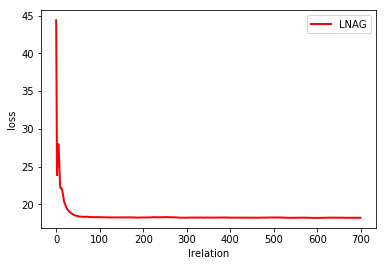

In [166]:
plt.plot(np.arange(num_rounds),L_NAG,"r-",linewidth=2,label='LNAG')
plt.legend(loc=1)
plt.xlabel('Irelation')
plt.ylabel('loss')
plt.show()

In [167]:
def RMSProp(xt,yt,w,b,alpha,num_rounds,xv,yv,C,batch_size):
	LRMSProp = []
	yy = 0.9
	w_Gt = np.zeros(w.shape)
	b_Gt = 0
	e = 1e-9
	gama = 0.001
	for i in range(num_rounds):
		random = list(set(np.random.randint(0,X_train.shape[0],size=batch_size)))
		dx = X_train[random]
		dy = y_train[random]
		w_gt,b_gt = gradient(dx,dy,w,b,C=C)
		w_Gt = yy * w_Gt + (1-yy) * ( w_gt**2) 
		w = w - gama / np.sqrt(w_Gt+e) * w_gt
		b_Gt = yy * b_Gt + (1-yy) * ( b_gt**2) 
		b = b - gama / np.sqrt(b_Gt+e) * b_gt
		LRMSProp.append( loss(X_test,y_test,w,b,C=C) )
	return LRMSProp

In [168]:
eta=0.001
times=700
w = np.zeros(X_train.shape[1]).T
b=0
C = 50
batch_size = 3000
L_RMSProp= RMSProp(X_train,y_train,w,b,eta,times,X_validation,y_validation,C=C,batch_size=batch_size)

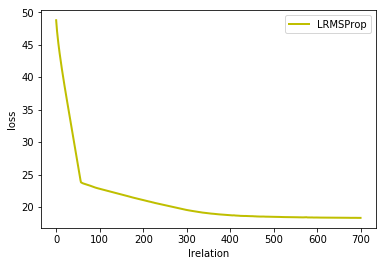

In [169]:
plt.plot(np.arange(num_rounds),L_RMSProp,"y-",linewidth=2,label='LRMSProp')
plt.legend(loc=1)
plt.xlabel('Irelation')
plt.ylabel('loss')
plt.show()

In [170]:
def AdaDelta(xt,yt,w,b,eta,num_rounds,xv,yv,C,batch_size):
	train_loss_history = []
	test_loss_history = []
	yy = 0.95
	w_Gt = np.zeros(w.shape)
	b_Gt = 0
	e = 1e-6
	wt = np.zeros(w.shape) 
	bt = 0
	for i in range(times):
		random = list(set(np.random.randint(0,X_train.shape[0],size=batch_size)))
		dx = X_train[random]
		dy = y_train[random]
		w_gt,b_gt = gradient(dx,dy,w,b,C)
		w_Gt = yy * w_Gt + (1-yy) * ( w_gt**2) 
		wdw = - ( np.sqrt(wt+e) / np.sqrt(w_Gt+e) ) * w_gt
		w = w + wdw
		wt = yy * wt + (1-yy) * ( wdw**2) 
		b_Gt = yy * b_Gt + (1-yy) * ( b_gt**2) 
		bdw = - ( np.sqrt(bt+e) / np.sqrt(b_Gt+e) ) * b_gt
		b = b + bdw
		bt = yy * bt + (1-yy) * ( bdw**2) 
		test_loss_history.append( loss(X_test,y_test,w,b,C) )
	return test_loss_history

In [171]:
eta=0.001
times=700
w = np.zeros(X_train.shape[1]).T
b=0
C = 50
batch_size = 3000
L_AdaDelta = AdaDelta(X_train,y_train,w,b,eta,times,X_validation,y_validation,C=C,batch_size=batch_size)

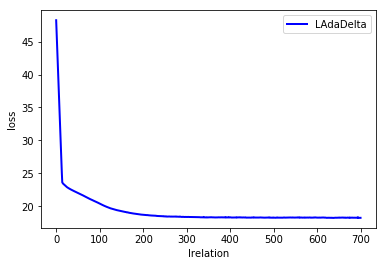

In [172]:
plt.plot(np.arange(num_rounds),L_AdaDelta,"b-",linewidth=2,label='LAdaDelta')
plt.legend(loc=1)
plt.xlabel('Irelation')
plt.ylabel('loss')
plt.show()

In [173]:
def Adam(xt,yt,w,b,eta,times,xv,yv,C,batch_size):
	LAdam = []
	beta1 = 0.9
	yy = 0.999
	gama = 1e-3
	e = 1e-8	
	wm = np.zeros(w.shape)
	w_Gt = np.zeros(w.shape)
	bm = 0
	b_Gt = 0
	for i in range(times):
		random = list(set(np.random.randint(0,yt.size,size=batch_size)))
		dx = xt[random]
		dy = yt[random]
		w_gt,b_gt = gradient(dx,dy,w,b,C=C)
		wm = beta1 * wm + (1-beta1) * w_gt
		w_Gt = yy * w_Gt + (1-yy) * ( w_gt**2) 
		alp = gama * np.sqrt(1-yy**(i+1) ) / (1-beta1**(i+1) )
		w = w - alp * wm / np.sqrt(w_Gt + e)
		bm = beta1 * bm + (1-beta1) * b_gt
		b_Gt = yy * b_Gt + (1-yy) * ( b_gt**2) 
		alp = eta * np.sqrt(1-yy**(i+1) ) / (1-beta1**(i+1) )
		b = b - alp * bm / np.sqrt(b_Gt + e)
		LAdam.append( loss(xv,yv,w,b,C) )
	return LAdam

In [174]:
eta=0.001
times=700
w = np.zeros(X_train.shape[1]).T
b=0
C = 50
batch_size = 3000
L_Adam = Adam(X_train,y_train,w,b,eta,times,X_validation,y_validation,C,batch_size)

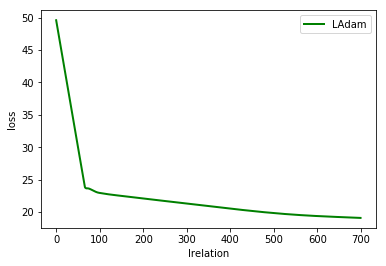

In [175]:
plt.plot(np.arange(num_rounds),L_Adam,"g-",linewidth=2,label='LAdam')
plt.legend(loc=1)
plt.xlabel('Irelation')
plt.ylabel('loss')
plt.show()

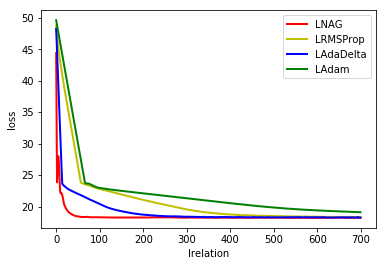

In [176]:
plt.plot(np.arange(num_rounds),L_NAG,"r-",linewidth=2,label='LNAG')
plt.plot(np.arange(num_rounds),L_RMSProp,"y-",linewidth=2,label='LRMSProp')
plt.plot(np.arange(num_rounds),L_AdaDelta,"b-",linewidth=2,label='LAdaDelta')
plt.plot(np.arange(num_rounds),L_Adam,"g-",linewidth=2,label='LAdam')
plt.legend(loc=1)
plt.xlabel('Irelation')
plt.ylabel('loss')
plt.show()